<a href="https://colab.research.google.com/github/MK316/workshops/blob/main/20230512_GNU/GNU_session03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 🎓 **Session 3: Digital Transformation in class**

🐾 Sample: [Myclassroom Spring 2023](https://github.com/MK316/Spring2023#readme)

##**\<Table of Contents>**

||Keyword|Ref. Link|
|--|:--|--|
|00|**Overview**|
|01|**Digital Literacy in Higher Education**||
|02|**Coding, APIs & AI tools: Engaging students, promoting collboration, personalized learning** | |
|03|**Challenges and opportunities**| |
|04|**Q & As**||

---

# Setup

In [70]:
#@markdown 🌱 Set-up: install, import libraries to use {pyqrcode, gtts, IPython, pandas, numpy, nltk, random}
%%capture
!pip install pyqrcode
!pip install gtts
!pip install wordcloud

# display, qr code
from IPython.display import YouTubeVideo, Image, Audio, display
!pip install gtts
import pandas as pd
import pyqrcode
from pyqrcode import QRCode
from gtts import gTTS
from ipywidgets import widgets
import os
import numpy as np
import random
# wordcloud
!pip install wordcloud nltk
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

import urllib.request

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#@markdown Get Korean font
%%capture
!wget https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf -O NanumGothic.ttf

---
# 🔍 **[0] Overview:**

## 1. Survey (설문) 


|Survey link || View result|
|--|--|--|
|1. Google [*Survey link*](https://forms.gle/7NYj7QEVwWCs4pbr5)|(왼쪽 링크를 눌러 설문을 완료)|2. View [_results_](https://docs.google.com/forms/d/1oIS7ZcUr1-BGclHxl5At9IvjKK2P6IfDDrR8w9bxkpk/edit)|

In [19]:
#@markdown 📢 Instruction: (in Korean)
def tts(text):
  tts = gTTS(text, lang = "ko", slow = False)
  tts.save("myaudio.mp3")
  return Audio("myaudio.mp3")

txt = """
안녕하세요 여러분! 시작에 앞서 아주 간단한 설문을 함께 해 보도록 하겠습니다. 설문은 간단한 4개의 문항이며 30초 정도 소요될 것입니다.
지금 보고 계시는 콜랩 페이지를 열고 계시다면, 위의 설문 링크를 눌러 설문을 마쳐 주시기 바랍니다.
그렇지 않다면 본인 스마트폰 카메라 앱을 열어 아래 큐알코드를 읽은 후, 설문 링크를 따라가서 설문을 마쳐 주시기 바랍니니다.
"""

tts(txt)
Audio("myaudio.mp3", autoplay=True)

In [ ]:
#@markdown QR display
s = "https://forms.gle/7NYj7QEVwWCs4pbr5"

# Generate QR code
url = pyqrcode.create(s)

# Create and save the png file naming "myqr.png"
url.svg("myqrcode.svg", scale=12)

from IPython.display import SVG, display
def show_svg(file):
    display(SVG(file))

show_svg("myqrcode.svg")

---
#🔍 **[1] Digital Literacy in Higher Education**

- **The role or importance of digital literacy** within the context of higher education institutions and **learning experiences.**
- By integrating digital tools and resources into the classroom, **educators can create more dynamic, personalized, and engaging learning experiences** that cater to the diverse needs of today's students.

In [ ]:

from IPython.display import Image, display

Slides = "1. Cover" #@param = ["1. Cover","2. Digital Literacy"]
slides = Slides.split(".")
sn = int(slides[0])-1

slide_list = ["https://github.com/MK316/Spring2023/raw/main/data/survey_ko.png",
            "https://github.com/MK316/Spring2023/raw/main/data/survey_en.png"]

slide = slide_list[sn]
image = Image(url, width=800, height=600)
display(image)

---
# 🔍**[2] Coding, APIs and AI tools:** _Engaging students, promoting collaborations, personalized learning_

## Grouping with 30 students

In [ ]:
#@markdown Names (30) to dataframe
names = ['Olivia', 'Emma', 'Ava', 'Sophia', 'Isabella', 'Charlotte', 'Amelia', 'Mia', 'Harper', 'Evelyn', 'Liam', 'Noah', 'Oliver', 'Elijah', 'William', 'James', 'Benjamin', 'Lucas', 'Henry', 'Alexander', 'Mason', 'Michael', 'Ethan', 'Daniel', 'Jacob', 'Logan', 'Jackson', 'Levi', 'Sebastian', 'Mateo']
df = pd.DataFrame()
df["Names"] = names
attlist = df.Names.values.tolist()

def grouping(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

print("Number of enrolled students: %d"%len(df['Names']))
df.head()

In [64]:
#@markdown Random grouping
list = __builtins__.list
import pandas as pd
import random

def grouping(lst, group_size):
    for i in range(0, len(lst), group_size):
        yield lst[i:i + group_size]

attlist = ['Olivia', 'Emma', 'Ava', 'Sophia', 'Isabella', 'Charlotte', 'Amelia', 'Mia', 'Harper', 'Evelyn', 'Liam', 'Noah', 'Oliver', 'Elijah', 'William', 'James', 'Benjamin', 'Lucas', 'Henry', 'Alexander', 'Mason', 'Michael', 'Ethan', 'Daniel', 'Jacob', 'Logan', 'Jackson', 'Levi', 'Sebastian', 'Mateo']

random.shuffle(attlist)

gsize = input("Size of each group: ")
gs = int(gsize)

mylist = list(grouping(attlist, gs))
ngroups = len(mylist)

print(mylist)
print("=" * 50)
print("Number of groups: %d in total." % ngroups)

gn = ngroups
gname = []
df1 = pd.DataFrame()
for i in range(0, gn):
    nam = "G" + str(i + 1)
    gname.append(nam)

df1['Group'] = gname
df1['Members'] = mylist

df1


Size of each group: 4
[['Mia', 'William', 'Jacob', 'Olivia'], ['Mason', 'Oliver', 'Benjamin', 'Harper'], ['Charlotte', 'Jackson', 'Emma', 'Amelia'], ['James', 'Ava', 'Henry', 'Sophia'], ['Isabella', 'Sebastian', 'Logan', 'Elijah'], ['Levi', 'Alexander', 'Noah', 'Ethan'], ['Michael', 'Mateo', 'Evelyn', 'Lucas'], ['Daniel', 'Liam']]
Number of groups: 8 in total.


,Group,Members
0,G1,"[Mia, William, Jacob, Olivia]"
1,G2,"[Mason, Oliver, Benjamin, Harper]"
2,G3,"[Charlotte, Jackson, Emma, Amelia]"
3,G4,"[James, Ava, Henry, Sophia]"
4,G5,"[Isabella, Sebastian, Logan, Elijah]"
5,G6,"[Levi, Alexander, Noah, Ethan]"
6,G7,"[Michael, Mateo, Evelyn, Lucas]"
7,G8,"[Daniel, Liam]"


In [ ]:

#@markdown Save the list to Google drive: 
from google.colab import drive
drive.mount('/content/drive')
fn = input('file name: ')
path = '/content/drive/My Drive/myclass/S2023/' + fn
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df1.to_csv(f, index=False)

print("="*50)
print("Saved file: ")
data = pd.read_csv(path)
print(data)
res = input("Unmount drive? (y or n)")

if res == "y":
  drive.flush_and_unmount()
else:
  print("Okay, the drive is still on.")

## Text-to-Text: Language learning/teaching tool

In [66]:
#@markdown Convert Statement to YES-NO question (Audio play) with some restrictions (only be verb)
def etts(text):
  text_to_say = text

  gtts_object = gTTS(text = text_to_say,
                     lang = "en",
                    slow = False)
  
  gtts_object.save("E-audio.mp3")
  return Audio("E-audio.mp3")

def ktts(text):
  text_to_say = text

  gtts_object = gTTS(text = text_to_say,
                     lang = "ko",
                    slow = False)
  
  gtts_object.save("K-audio.mp3")
  return Audio("K-audio.mp3")

sentence = input("Type a sentence containing a be verb: e.g., She is vising her uncle.")
beverbs = ["is", "was", "are", "were"]
pronouns = ["I","You","He","She","They","It"]
names = ["Mary", "Jane", "Tom","Thomas","Jessica", "Bill"]

def check_word(list_A, list_B):
    for a in list_A:
        for b in list_B:
            if b in a:
                mword = a
                return True, mword
    return False, None


cat1 = sentence.split()

result = check_word(cat1,beverbs)

if result[0] == True:
  if cat1[0] in pronouns:
      b = result[1]
      be = " "+b+" "
      ss = sentence.split(be)
      subj = ss[0]
      nsubj = subj[0].lower()+subj[1:]
      pred = ss[1]
      w1 = b[0].upper() + b[1:] # Capitalized be verb
      newsent = w1 + " " + nsubj + " " + pred[:-1] + "?"
      mytext = "I'll make it to a yes-no question: " + newsent
      print(newsent)
  elif cat1[0] not in pronouns and cat1[0] in names:
        b = result[1]
        be = " "+b+" "
        ss = sentence.split(be)
        subj = ss[0]
        pred = ss[1]
        w1 = b[0].upper() + b[1:] # Capitalized be verb
        newsent = w1 + " " + subj + " " + pred[:-1] + "?"
        mytext = "I'll make it to a yes-no question: " + newsent
        print(newsent)
  elif cat1[0] not in pronouns and cat1[0] not in names:
        b = result[1]
        be = " "+b+" "
        ss = sentence.split(be)
        subj = ss[0]
        nsubj = subj[0].lower()+subj[1:]
        pred = ss[1]
        w1 = b[0].upper() + b[1:] # Capitalized be verb
        newsent = w1 + " " + nsubj + " " + pred[:-1] + "?"
        mytext = "I'll make it to a yes-no question: " + newsent
        print(newsent)

else:
    mytext = "The sentence you\' provided does not contain a 'Be' verb. Try again."
    print("Type a sentence that contains a be verb.")

etts(mytext)
Audio("E-audio.mp3",autoplay=True)

Type a sentence containing a be verb: e.g., She is vising her uncle.He is coming back from work.
Is he coming back from work?


Chapter Overview using Wordcloud

In [ ]:
#@markdown Wordcloud

import nltk
import os
nltk.download("punkt")

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#@markdown 🌀 Text file to read (ch.5): filename = RE.ch05.txt

url = "https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt"
os.system("curl " + url + " > RE.ch05.txt")

#@markdown 🌀 read a text file in the server: as _text_
file = open("RE.ch05.txt")
text = file.read().replace("\n", " ")
file.close()

wc = WordCloud().generate(text) 
plt.imshow(wc)

[sample text](https://placesjournal.org/reading-list/the-pasts-and-futures-of-the-floating-city/)

In [ ]:
#@markdown Wordcloud with your own text: Paste your text
user_text = input("Please paste your text here: ")
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
    max_words=100
).generate(user_text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Text-to-Speech API 

+ TTS (**Text-to-Speech**)
+ API (**Application Programming Interface**)

|Languages | Sample text to paste|
|--|--|
|**Korean**| 2023년 경상국립대학교 인문학연구소 주최 초청강연에 오신것을 환영합니다. |
| **English**| Welcome to the invited lecture hosted by the Humanities Research Institute at Gyeongsang National University in 2023. |
| **German**| Herzlich willkommen zum eingeladenen Vortrag, der vom Institut für Geisteswissenschaften an der Gyeongsang National University im Jahr 2023 veranstaltet wird. |
|**French** |Bienvenue à la conférence invitée organisée par l'Institut de recherche en humanités de l'Université nationale de Gyeongsang en 2023. |
| **Spanish**| Bienvenido a la conferencia invitada organizada por el Instituto de Investigación de Humanidades de la Universidad Nacional de Gyeongsang en 2023. |
|**Russian**| Добро пожаловать на приглашенную лекцию, организованную Институтом гуманитарных исследований национального университета Gyeongsang в 2023 году.|

In [ ]:
#@markdown gTTS (multi-language)
from gtts import gTTS
from IPython.display import Audio
import ipywidgets as widgets

def etts(mytext, lang='en', dialect=None, slow=False):
    if slow:
        speed = 0.5
    else:
        speed = 1.0
    
    if dialect:
        lang_code = f"{lang}-{dialect}"
    else:
        lang_code = lang
    
    tts = gTTS(mytext, lang=lang_code, slow=slow)
    tts.speed = speed
    tts.save('sample.mp3')
    return Audio('sample.mp3', autoplay=True)

# Define the language and dialect options
languages = {
    'English': 'en',
    'French': 'fr',
    'German': 'de',
    'Italian': 'it',
    'Japanese': 'ja',
    'Korean': 'ko',
    'Spanish': 'es',
    'Russian': 'ru'
}

# Create the language and dialect dropdown widgets
lang_dropdown = widgets.Dropdown(options=languages, value='en', description='Language:')

# Create the slow checkbox widget
slow_checkbox = widgets.Checkbox(value=False, description='Slow')

# Define a function to handle the button click event
def on_button_click(btn):
    lang = lang_dropdown.value
    display(etts(input_text.value, lang=lang, slow=False))

# Create the text input widget and button
input_text = widgets.Text(description='Text:')
btn = widgets.Button(description='Speak')
btn.on_click(on_button_click)

# Display the widgets
display(widgets.VBox([input_text, lang_dropdown, slow_checkbox, btn]))


## Text-to-Image 

+ [DallE (OpenAI)](https://labs.openai.com/e/HVdzNDAN920zdEyMiQbrHZQq) >> [Bing (MS)](https://www.bing.com/images/create?form=FLPGEN)
+ [Midjourney]()


In [68]:
#@markdown Activity: Listen carefully and create an image that reflects what you have heard.

mytext = """
Tell him that he needs a new will.
"""

etts(mytext)
Audio("E-audio.mp3",autoplay=True)

Image upload [here](https://padlet.com/miranege/dl-board-spring-2023-9asqhuynm97r91xo)

## AI generated videos

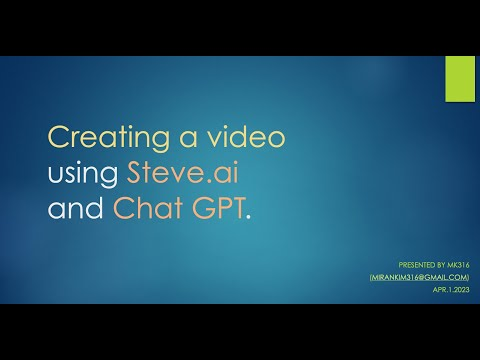

In [69]:
urls = "1" #@param = [1,2,3,4,5]
url = int(urls)-1
url_list = ["s3I8_XVYjB8",
             "EREpwtVwueQ",
             "",
             "",
             "",
             ""
             ]


video = YouTubeVideo(url_list[url], width=800, height=450)
display(video)

## Speech-to-Text

+ Whisper API

In [80]:
#@markdown Install whisper
%%capture
!pip install git+https://github.com/openai/whisper.git 

In [90]:
#@markdown Generate speech
language = "fr" #@param = ["ko", "en","fr"]
text = input("Type your text: ")

def tts(mytext):
  mytext = text
  tts = gTTS(mytext, lang = language, slow=False)
  tts.save("audio.mp3")

tts(text)
Audio("audio.mp3", autoplay=True)

Type your text: where is the hospital?


In [91]:
#@markdown Speech-to-Text:
import whisper

model = whisper.load_model("base")
result = model.transcribe("audio.mp3")
print("="*50)
print("Speech-to-Text:", result["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Speech-to-Text:  où est Rizze Hospital ?


[sample audio](https://github.com/MK316/workshops/raw/main/data/korean19.mp3)

Oiriginal text from https://accent.gmu.edu/: Please call Stella.  Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station.

In [92]:
#@markdown Upload your file for STT:
from google.colab import files
uploaded = files.upload()

Saving korean19.mp3 to korean19.mp3


In [ ]:
#@markdown Speech-to-Text: e.g., korean19.mp3
import whisper
filename = input("File name: ")
model = whisper.load_model("base")
result = model.transcribe(filename)
print("="*50)
print("Speech-to-Text:", result["text"])

## Multimodality

### Text

In [ ]:
import random

areas = "Level_2" #@param = ["Level_1", "Level_2", "Level_3"]

if areas == "Level_1":
    abbreviations = {
        'Gross Domestic Product': {'abbr': 'GDP', 'hints': ['GDP is like counting all the money made in a whole country in one year', 'It helps us understand how much money a country has']},
        'Non-Governmental Organization': {'abbr': 'NGO', 'hints': ['NGOs are groups that want to make the world a better place without working for the government', 'They try to fix problems like helping people, animals, or the environment']},
        'United Nations': {'abbr': 'UN', 'hints': ['The UN is a big club of countries who work together to make sure everyone gets along and has what they need', 'They want to make the world a better and fairer place for everyone']},
        'European Union': {'abbr': 'EU', 'hints': ['The EU is like a club of European countries who want to be friends and work together', 'They help each other out with things like trade, money, and making laws']}
    }

elif areas == "Level_2":
    abbreviations = {
        'Gross Domestic Product': {'abbr': 'GDP', 'hints': ['The total value of goods and services produced in a country in a year', 'A measure of a country\'s wealth']},
        'Non-Governmental Organization': {'abbr': 'NGO', 'hints': ['An organization that operates independently of government to pursue social or political aims', 'A non-profit organization that addresses social or environmental issues']},
        'United Nations': {'abbr': 'UN', 'hints': ['An international organization founded in 1945 for promoting peace and cooperation among countries', 'An organization that supports economic and social development and human rights']},
        'European Union': {'abbr': 'EU', 'hints': ['A political and economic union of European countries established in 1993', 'An organization that promotes peace, stability, and prosperity among its members']}
    }

elif areas == "Level_3":
    abbreviations = {
        'Gross Domestic Product': {'abbr': 'GDP', 'hints': ['The total value of goods and services produced in a country in a given year', 'An economic indicator that measures a country\'s wealth']},
        'Non-Governmental Organization': {'abbr': 'NGO', 'hints': ['An organization that operates independently of government, usually to pursue social or political aims', 'A non-profit organization that works to address social or environmental issues']},
        'United Nations': {'abbr': 'UN', 'hints': ['An international organization founded in 1945 to promote peace, security, and cooperation among member countries', 'An organization with the mission to maintain international peace and security, promote human rights, and support economic and social development']},
        'European Union': {'abbr': 'EU', 'hints': ['A political and economic union of European countries established in 1993', 'An organization created to promote peace, stability, and economic prosperity among member countries']}
    }

keys = list(abbreviations.keys())

total_points = 0  # Initialize the total points earned

while True:
    # Select a random abbreviation
    abbreviation = random.choice(keys)
    
    # Get the full terminology and hints for the selected abbreviation
    full_term = abbreviations[abbreviation]['abbr']
    hints = abbreviations[abbreviation]['hints']
    
    # Show the abbreviation to the player and ask for the full terminology
    guess = input(f"What is the abbreviated name for '[{abbreviation}]'? ")    
    # Initialize the number of hints used and points to 0
    hints_used = 0
    points = 5
    
    # Check if the player's guess is correct
    while guess.lower() != full_term.lower():
        if hints_used == len(hints):
            print(f"Incorrect. The correct answer is '{full_term}'.")
            points -= 1
            break
        
        # Give a hint based on the number of hints used
        if hints_used == 0:
            hint = random.choice(hints)
            print(f"Incorrect. Hint: {hint}")
            points -= 1
        else:
            hint = random.choice(hints)
            while hint in previous_hints:  # Make sure the same hint is not given twice in a row
                hint = random.choice(hints)
            print(f"Incorrect. Here's another hint: {hint}")
            points -= 1
        
        guess = input(f"What is the abbreviated name for '[{abbreviation}]'? ")
        hints_used += 1
        points -= 1
        
        previous_hints = [hint]  # Store the hint given in the previous round
        
    if guess.lower() == full_term.lower():
        total_points += points  # Add the earned points to the total
        print(f"Correct! You earned {points} points. Total points: {total_points}.")
    
    # Ask the player if they want to play again
    play_again = input("Play again? (y/n) ")
    if play_again.lower() != 'y':
        break

# Display the total points earned during the game
print(f"Total points earned: {total_points}")


What is the abbreviated name for '[Non-Governmental Organization]'? NGO
Correct! You earned 5 points. Total points: 5.
Play again? (y/n) n
Total points earned: 5


## Audio: Reverse sound signal?

'강의실' 거꾸로?

In [ ]:
#@markdown Install {pyqrcode}
!pip install pyqrcode
!pip install gradio

import pyqrcode
from pyqrcode import QRCode

In [ ]:
#@markdown Reverse your audio: {Gradio}
import numpy as np
import gradio as gr


def reverse_audio(audio):
    sr, data = audio
    reversed_audio = (sr, np.flipud(data))
    return reversed_audio


mic = gr.Audio(source="microphone", type="numpy", label="Speak here...")
gr.Interface(reverse_audio, mic, "audio").launch(share = True)

In [ ]:
#@markdown Enter the link to generate a QR image
s = input("Paste the link: ")

# Generate QR code
url = pyqrcode.create(s)

# Create and save the png file naming "myqr.png"
url.svg("myqrcode.svg", scale=10)

from IPython.display import SVG, display
def show_svg(file):
    display(SVG(file))

show_svg("myqrcode.svg")
     

### Image

### Video

---
#🔍 **[3] Challenges and opportunities**

# Survey on a Digital literacy & major course link

+ Response (in Korean) [link](https://github.com/MK316/Spring2023/blob/main/data/survey1.txt)
+ Response (in English) [link](https://raw.githubusercontent.com/MK316/Spring2023/main/data/survey_en.txt)

In [ ]:
#@markdown Wordcloud (Korean)
import urllib.request

# Replace this with the URL of the GitHub-hosted text file
github_url = "https://raw.githubusercontent.com/MK316/Spring2023/main/data/survey1.txt"
response = urllib.request.urlopen(github_url)
korean_text = response.read().decode('utf-8')

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Replace 'NanumGothic.ttf' with the file path of the uploaded Korean font file
font_path = 'NanumGothic.ttf'

wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=800,
    max_words=100
).generate(korean_text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
print("Q: 'Digital Literacy and English Language'라는 수업을 듣게 된다면 가장 우려되는 점은 무엇인가요? 가능한 모두 써 주세요. (한국어로)")
plt.show()


In [ ]:
#@markdown Wordcloud (English): stopwords removed
# Replace this with the URL of the GitHub-hosted text file
github_url = "https://raw.githubusercontent.com/MK316/Spring2023/main/data/survey_en.txt"

response = urllib.request.urlopen(github_url)
text = response.read().decode('utf-8')
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

wordcloud = WordCloud(
    stopwords=english_stopwords,
    background_color='white',
    width=800,
    height=800,
    max_words=100
).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

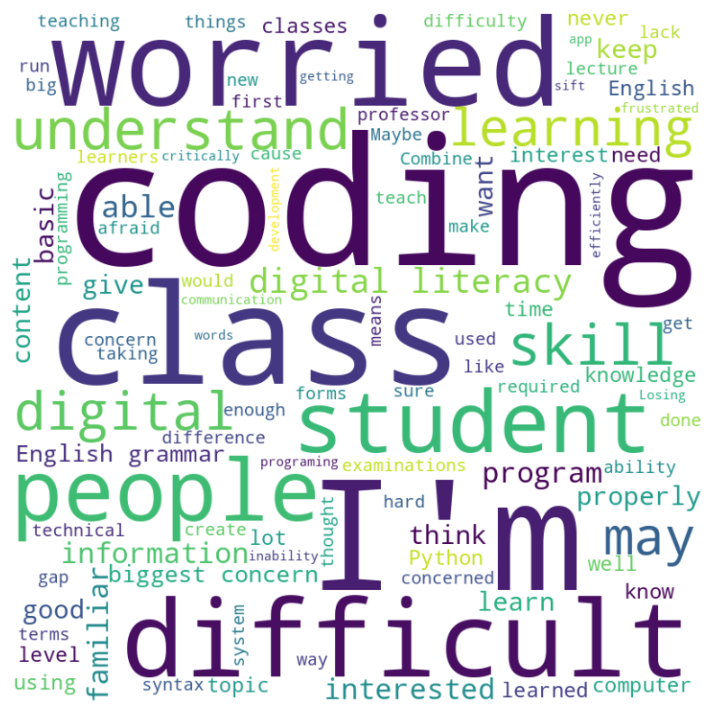

In [41]:
#@markdown Wordcloud (Korean / English) image from github
from IPython.display import Image, display

url = "2. English" #@param = ["1. Korean","2. English"]
url = url.split(".")
sn = int(url[0])-1

url_list = ["https://github.com/MK316/Spring2023/raw/main/data/survey_ko.png",
            "https://github.com/MK316/Spring2023/raw/main/data/survey_en.png"]

url = url_list[sn]
image = Image(url, width=800, height=600)
display(image)


## 2. Slides



In [ ]:
Slides = "2" #@param = [1,2,3,4,5]
sn = int(Slides)-1

slides_list = ["s3I8_XVYjB8",
             "EREpwtVwueQ",
             "",
             "",
             "",
             ""
             ]


image = Image(slides_list[sn], width=800, height=450)
display(image)

In [ ]:
#@markdown Slides:
Slide_number = "0" #@param = [0,1,2,3,4,5]
n = int(Slide_number)

# Import libraries
from IPython.display import Image
imglist = ["https://github.com/MK316/workshops/raw/main/20230512_GNU/images/image01.jpeg"]
url = imglist[n]
Image(url, width = 800, height = 600)

# Temporary codes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.flush_and_unmount()